# Training example TPV 23-3D

TPV 23-3D is a benchmark exercise that is designed to test if computer codes that simulate dynamic earthquake rupture are working as intended [(Harris et al., SRL 2018)](https://pubs.geoscienceworld.org/ssa/srl/article/89/3/1146/530061/A-Suite-of-Exercises-for-Verifying-Dynamic). It was designed by the [SCEC/USGS Spontaneous Rupture Code Verification Project](https://strike.scec.org/cvws/) and features:

* spontaneous rupture on two mutually parallel 2D vertical planar faults  
* homogeneous half-space: $V_p=6000\,m/s, V_s=3464\,m/s, \rho=2670\,kg/m^3$ 
* linear-slip weakening (LSW) friction
* Continuum Damage Breakage Model from [Lyakhovsky et al. (2016)](https://academic.oup.com/gji/article-abstract/206/2/1126/2606007)

![](tpv23.png)

[Detailed benchmark description (SCEC)](https://strike.scec.org/cvws/download/TPV22_23_Description_v08.pdf).

### Bulk Material Parameters of CDBM [(Lyakhovsky et al., 2016)](https://academic.oup.com/gji/article-abstract/206/2/1126/2606007)

| Parameters (Col 1) | Values (Col 1) | Units (Col 1)       | Parameters (Col 2) | Values (Col 2) | Units (Col 2)       |
|--------------------|----------------|--------------------|--------------------|----------------|--------------------|
| $\lambda_0$       | 32             | GPa               | $a_0$             | 7.43          | GPa               |
| $\mu_0$           | 32             | GPa               | $a_1$             | -22.14        | GPa               |
| $\gamma_r$        | 37             | 1                 | $a_2$             | 20.93         | GPa               |
| $\xi_0$           | -0.75          | 1                 | $a_3$             | -8.56         | GPa               |
| $C_d$             | $5.0 \times 10^{-6}$ | (Pa$\cdot$ s)$^{-1}$ | $C_B$             | $100C_d$      | (Pa$\cdot$ s)$^{-1}$ |
| $\beta_{cr}$      | 0.05           | 1                 | $\rho$           | 2760          | kg/m$^3$          |


### Localized off-fault damage zone

We can see localized damage structures that extend from the fault plane into the bulk material at an angle of around 35.6 degrees. The theory of CDB describes the internal friction angle of the material in analogy to \citet{byerlee1978friction}. The equivalent internal friction angle in CDB is determined from the nonlinear material properties $\xi_0$ in the parameter table above. As listed in the above table, $\xi_0$ is -0.75 \citet{lyakhovsky1997distributed}. This corresponds to an internal friction angle of $43$ degrees. In the simulation of the following figure, the angle between the maximum compressive principal stress and the fault plane is 59.1 degrees. The two conjugate weak planes should take an angle of 45 - 43/2 = 23.5 degrees from the maximum compressive principal stress. This means the two conjugate weak planes should take angles of 59.1 - 23.5 = 35.6 degrees or 59.1 + 23.5 = 82.6 degrees. We find this theoretical angle of 35.6 degrees from the fault plane in the following figure (red dashed line) agrees with our numerical simulation results.

More detailed results are shown in our paper that is going to be submitted soon (Niu et al., 2025, in preparation).

![](off_fault_damage.png)

### How the off-fault damage impacts on earthquake interaction?

In this section, we will see how the off-fault damage impacts earthquake interaction, using the TPV23 configuration. 

In the linear (visco-)elastic case, the second fault will not be ruptured. It is ruptured because as the damage extends from the first fault, the stress field will be perturbed.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

import seissolxdmf as seisx
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as mcolors

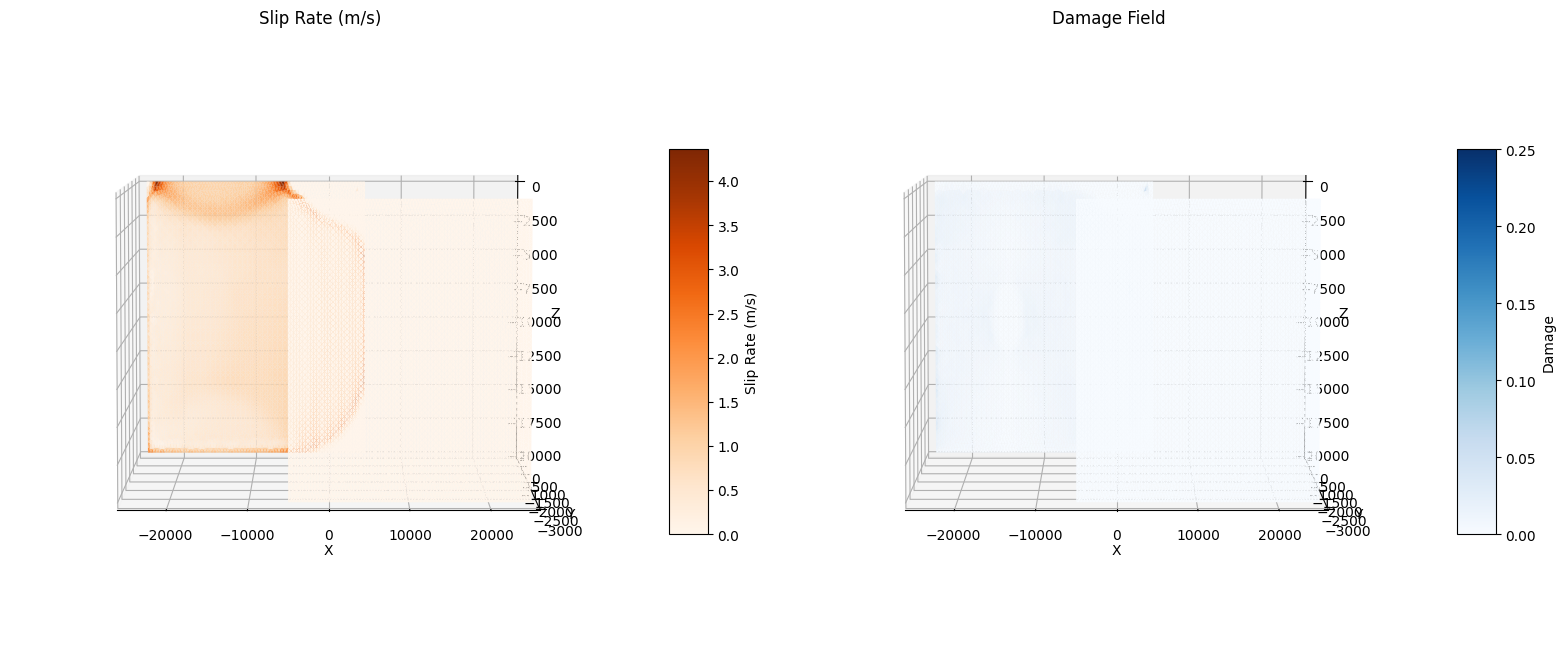

In [27]:
# Load data
xdmfFilename = "output_cdb/cdb_1401CFL1p0_tpv23-fault.xdmf"
sx = seisx.seissolxdmf(xdmfFilename)
ndt = sx.ReadNdt() - 1
xyz = sx.ReadGeometry()
connect = sx.ReadConnect()
ndt = 6
sRate = sx.ReadData('SRs', ndt)
damage = sx.ReadData('u_n', ndt)

# Define the colormap ranges
sRate_vmin, sRate_vmax = np.min(sRate), np.max(sRate)
sRate_norm = mcolors.Normalize(vmin=sRate_vmin, vmax=sRate_vmax)

damage_vmin, damage_vmax = 0, 0.25
damage_norm = mcolors.Normalize(vmin=damage_vmin, vmax=damage_vmax)

# Extract vertices for each triangular face in the mesh
triangles = [xyz[connect[i]] for i in range(connect.shape[0])]

# Prepare data for the triangles
verts = [tri for tri in triangles]
sRate_colors = [plt.cm.Oranges(sRate_norm(np.mean(sRate[i]))) for i in range(len(verts))]
damage_colors = [plt.cm.Blues(damage_norm(np.mean(damage[i]))) for i in range(len(verts))]

# Create subplots
fig = plt.figure(figsize=(16, 8))

# First subplot: Slip Rate
ax1 = fig.add_subplot(121, projection='3d')
sRate_collection = Poly3DCollection(verts, alpha=1.0, facecolor=sRate_colors)
ax1.add_collection3d(sRate_collection)
ax1.set_xlim(np.min(xyz[:, 0]), np.max(xyz[:, 0]))
ax1.set_ylim(np.min(xyz[:, 1]), np.max(xyz[:, 1]))
ax1.set_zlim(-20e3, 0)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Slip Rate (m/s)')
sm1 = plt.cm.ScalarMappable(cmap='Oranges', norm=sRate_norm)
sm1.set_array([])
cbar1 = plt.colorbar(sm1, ax=ax1, shrink=0.5, aspect=10)
cbar1.set_label('Slip Rate (m/s)')

# Second subplot: Damage
ax2 = fig.add_subplot(122, projection='3d')
damage_collection = Poly3DCollection(verts, alpha=1.0, facecolor=damage_colors)
ax2.add_collection3d(damage_collection)
ax2.set_xlim(np.min(xyz[:, 0]), np.max(xyz[:, 0]))
ax2.set_ylim(np.min(xyz[:, 1]), np.max(xyz[:, 1]))
ax2.set_zlim(-20e3, 0)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Damage Field')
sm2 = plt.cm.ScalarMappable(cmap='Blues', norm=damage_norm)
sm2.set_array([])
cbar2 = plt.colorbar(sm2, ax=ax2, shrink=0.5, aspect=10)
cbar2.set_label('Damage')

# Adjust view angles
ax1.view_init(elev=5, azim=270)
ax2.view_init(elev=5, azim=270)

plt.tight_layout()
plt.show()


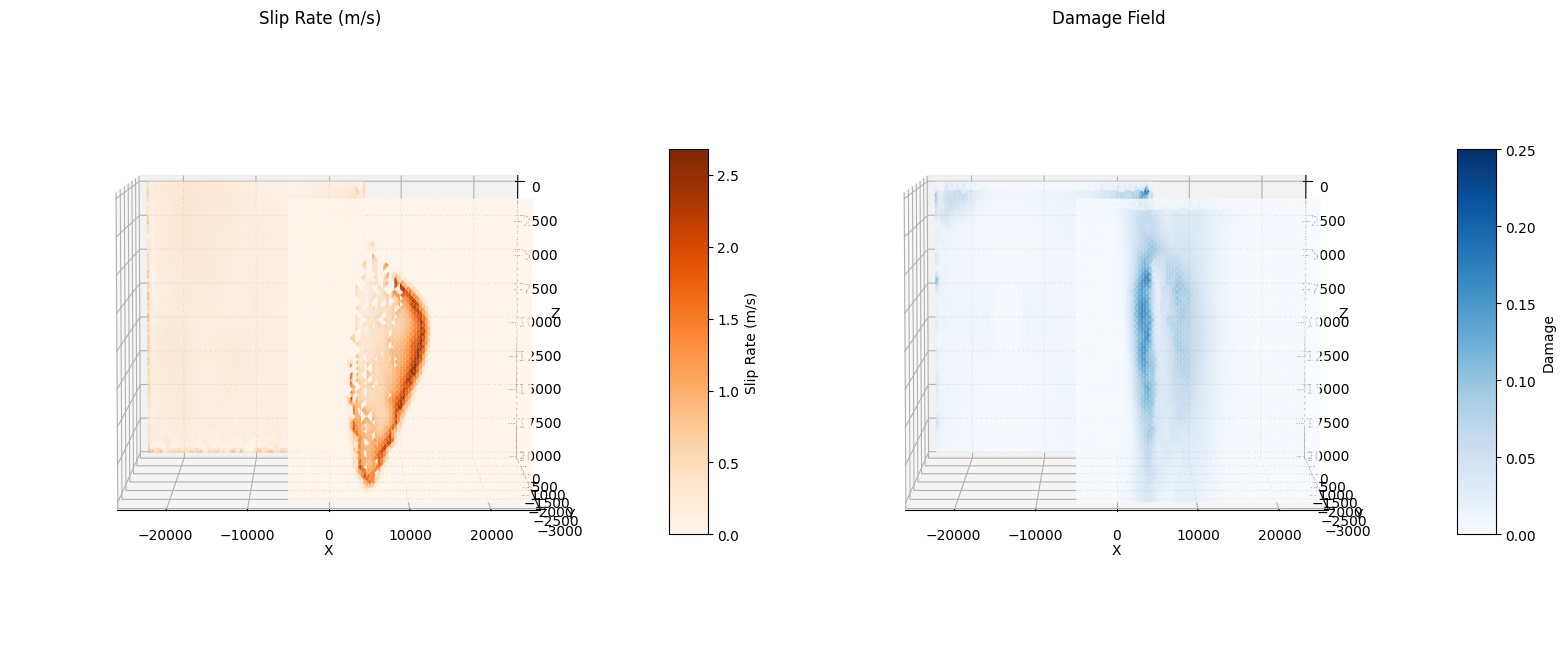

In [28]:
ndt = sx.ReadNdt()-1
sRate = sx.ReadData('SRs', ndt)
damage = sx.ReadData('u_n', ndt)

# Define the colormap ranges
sRate_vmin, sRate_vmax = np.min(sRate), np.max(sRate)
sRate_norm = mcolors.Normalize(vmin=sRate_vmin, vmax=sRate_vmax)

damage_vmin, damage_vmax = 0, 0.25
damage_norm = mcolors.Normalize(vmin=damage_vmin, vmax=damage_vmax)

# Extract vertices for each triangular face in the mesh
triangles = [xyz[connect[i]] for i in range(connect.shape[0])]

# Prepare data for the triangles
verts = [tri for tri in triangles]
sRate_colors = [plt.cm.Oranges(sRate_norm(np.mean(sRate[i]))) for i in range(len(verts))]
damage_colors = [plt.cm.Blues(damage_norm(np.mean(damage[i]))) for i in range(len(verts))]

# Create subplots
fig = plt.figure(figsize=(16, 8))

# First subplot: Slip Rate
ax1 = fig.add_subplot(121, projection='3d')
sRate_collection = Poly3DCollection(verts, alpha=1.0, facecolor=sRate_colors)
ax1.add_collection3d(sRate_collection)
ax1.set_xlim(np.min(xyz[:, 0]), np.max(xyz[:, 0]))
ax1.set_ylim(np.min(xyz[:, 1]), np.max(xyz[:, 1]))
ax1.set_zlim(-20e3, 0)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Slip Rate (m/s)')
sm1 = plt.cm.ScalarMappable(cmap='Oranges', norm=sRate_norm)
sm1.set_array([])
cbar1 = plt.colorbar(sm1, ax=ax1, shrink=0.5, aspect=10)
cbar1.set_label('Slip Rate (m/s)')

# Second subplot: Damage
ax2 = fig.add_subplot(122, projection='3d')
damage_collection = Poly3DCollection(verts, alpha=1.0, facecolor=damage_colors)
ax2.add_collection3d(damage_collection)
ax2.set_xlim(np.min(xyz[:, 0]), np.max(xyz[:, 0]))
ax2.set_ylim(np.min(xyz[:, 1]), np.max(xyz[:, 1]))
ax2.set_zlim(-20e3, 0)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Damage Field')
sm2 = plt.cm.ScalarMappable(cmap='Blues', norm=damage_norm)
sm2.set_array([])
cbar2 = plt.colorbar(sm2, ax=ax2, shrink=0.5, aspect=10)
cbar2.set_label('Damage')

# Adjust view angles
ax1.view_init(elev=5, azim=270)
ax2.view_init(elev=5, azim=270)

plt.tight_layout()
plt.show()

In [1]:
import os
import pandas as pd
import re

In [2]:
def find_receiver(directory, prefix, number):
    receiver_re = re.compile(f"{prefix}-faultreceiver-{number:05d}-(\\d)+.dat")
    for fn in os.listdir(directory):
        if receiver_re.match(fn):
            print(os.path.join(directory, fn))
            return os.path.join(directory, fn)

def read_receiver(filename):
    with open(filename) as receiver_file:
        receiver_file.readline()
        quantity_line = receiver_file.readline().strip()
        header_length = 2
        while receiver_file.readline()[0] == "#":
            header_length += 1
    quantity_line = quantity_line.replace('"', '')
    quantities = quantity_line[12:].split(" ,")
    receiver_df = pd.read_csv(filename, skiprows=header_length, header=None, sep="\\s+")
    receiver_df.columns = quantities
    return receiver_df

output_cdb/cdb_1401CFL1p0_tpv23-faultreceiver-00009-00000.dat
Index(['Time', 'SRs', 'SRd', 'T_s', 'T_d', 'P_n', 'u_n', 'Mud', 'StV'], dtype='object')
output_cdb/cdb_1401CFL1p0_tpv23-faultreceiver-00009-00000.dat


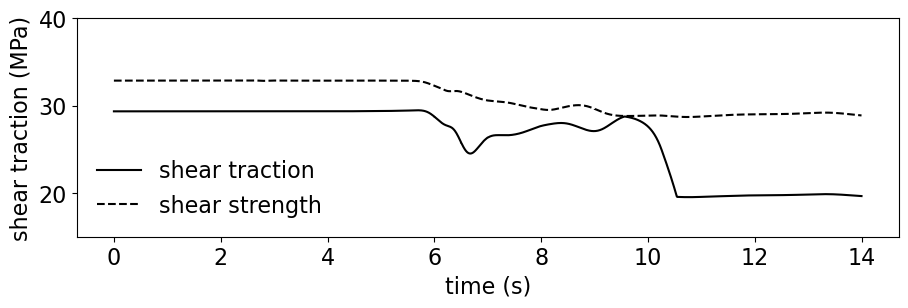

In [4]:
color_opts = ["k","r","m","c","g","b"]

n_recs = [9]

dists = [3, 5, 7]
dists = [-7]

csv_results = []

dirName = "output_cdb/"
prefi = "cdb_1401CFL1p0_tpv23"

comp = "T_s"

fSize = 16

fig, ax2 = plt.subplots(1,1,figsize=[9,3])

plt.subplot(111)
i_incre = 0
for i_r in n_recs:
    fiName = find_receiver(dirName,prefi,i_r)
    rec_fault = read_receiver(fiName)
    if i_incre == 0: print(rec_fault.columns)
    csv_results.append(rec_fault)
    plt.plot(rec_fault["Time"],rec_fault[comp]/1e6,color=color_opts[i_incre], label=f'shear traction')
    i_incre +=1

dirName = "output_cdb/"
prefi = "cdb_1401CFL1p0_tpv23"
    
plt.subplot(111)
i_incre = 0
for i_r in n_recs:
    fiName = find_receiver(dirName,prefi,i_r)
    rec_fault = read_receiver(fiName)
    plt.plot(rec_fault["Time"],-0.548*rec_fault["P_n"]/1e6,"--",color=color_opts[i_incre], label=f'shear strength')
    i_incre +=1

plt.xlabel('time (s)', fontsize=fSize)
ax2.tick_params('x', labelsize=fSize)
plt.ylabel('shear traction (MPa)', fontsize=fSize)
ax2.tick_params('y', labelsize=fSize)
#plt.title('Power Spectral Density', fontsize=20)
plt.legend(loc='lower left',frameon=False, fontsize=fSize)
plt.ylim([15,40])
plt.grid(False)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

#plt.savefig("p_shearTrac.pdf")